In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [384]:
basedir = os.path.join(os.path.realpath(''),'Results')

datadir = os.path.join(basedir,'Results_db.csv')
df_dbscancached = pd.read_csv(datadir)

datadir = os.path.join(basedir,'Results_dbcsanuncached.csv')
df_dbscanuncached = pd.read_csv(datadir)

datadir = os.path.join(basedir,'Results_kmeans.csv')
df_kmeanscached = pd.read_csv(datadir)

datadir = os.path.join(basedir,'Results_kmeansuncached.csv')
df_kmeansuncached = pd.read_csv(datadir)


73.36652146857499

85.21060709413369

In [360]:
datadir = os.path.join(os.path.realpath(''),'cached')
datadir = os.path.join(datadir,'Aggreegated1.csv')
df = pd.read_csv(datadir)

In [393]:
cachehit = df_kmeanscached.shape[0]
cachemiss = df_kmeansuncached.shape[0]
cachehitratio = (cachehit/(cachehit+cachemiss))*100
print("CACHE HIT RATIO IS: ", cachehitratio)

CACHE HIT RATIO IS:  85.21060709413369


In [392]:
cachehit = df_dbscancached.shape[0]
cachemiss = df_dbscanuncached.shape[0]
cachehitratio = (cachehit/(cachehit+cachemiss))*100
print("CACHE HIT RATIO IS: ", cachehitratio)

CACHE HIT RATIO IS:  73.36652146857499


In [361]:
df_hdbcache = df[df["success"] == True]
df_hdbcache = df_hdbcache[df_hdbcache['Latency']<120]
# df_hdbcache = df_hdbcache.sort_values(by='Latency',ascending=False)[:1000]
df_hdbcache_ = df_hdbcache.sort_values(by='Latency')
df_hdbcache = df_hdbcache.sort_values(by='Latency')[:1000]

df_hdbuncache = df[df["success"] == True]
df_hdbuncache = df_hdbuncache[df_hdbuncache['Latency']>120]
df_hdbuncache = df_hdbuncache.sort_values(by='Latency',ascending=False)

print(df_hdbcache.shape)
print(df_hdbuncache.shape)

(1000, 18)
(9599, 18)


In [135]:
df_dbscanuncached = df_dbscanuncached[df_dbscanuncached["success"] == True]
df_dbscanuncached = df_dbscanuncached[df_dbscanuncached["Latency"] < 2750]

df_kmeansuncached = df_kmeansuncached[df_kmeansuncached["success"] == True]
df_kmeansuncached = df_kmeansuncached[df_kmeansuncached["Latency"] < 2500]
print(df_dbscanuncached.shape)
print(df_kmeansuncached.shape)

(815, 17)
(862, 17)


In [143]:
#Removing Outliers and Balancing Data
df_dbscancached = df_dbscancached[df_dbscancached["success"] == True]
df_dbscancached = df_dbscancached[df_dbscancached["Latency"] < 1200][:df_dbscanuncached.shape[0]]
df_dbscancached_ = df_dbscancached[df_dbscancached["Latency"] < 700]

df_kmeanscached = df_kmeanscached[df_kmeanscached["success"] == True]
df_kmeanscached = df_kmeanscached[df_kmeanscached["Latency"] < 900][:df_kmeansuncached.shape[0]]

In [137]:
print(df_dbscancached.shape)
print(df_kmeanscached.shape)

(815, 17)
(862, 17)


In [138]:
print("KMEANS UNCACHED, Max Latency", df_kmeansuncached["Latency"].max())
print("KMEANS UNCACHED, Min Latency", df_kmeansuncached["Latency"].min())
print("DBSCAN UNCACHED, Max Latency", df_dbscanuncached["Latency"].max())
print("DBSCAN UNCACHED, Min Latency", df_dbscanuncached["Latency"].min())

print(" ================================ ")
print("DBSCAN CACHED, Max Latency", df_dbscancached["Latency"].max())
print("DBSCAN CACHED, Min Latency", df_dbscancached["Latency"].min())
print("KMEANS CACHED, Max Latency", df_kmeanscached["Latency"].max())
print("KMEANS CACHED, Min Latency", df_kmeanscached["Latency"].min())

KMEANS UNCACHED, Max Latency 2499
KMEANS UNCACHED, Min Latency 301
DBSCAN UNCACHED, Max Latency 2749
DBSCAN UNCACHED, Min Latency 592
DBSCAN CACHED, Max Latency 1124
DBSCAN CACHED, Min Latency 22
KMEANS CACHED, Max Latency 631
KMEANS CACHED, Min Latency 9


# KMEANS CACHED/UNCACHED LATENCY RESULTS

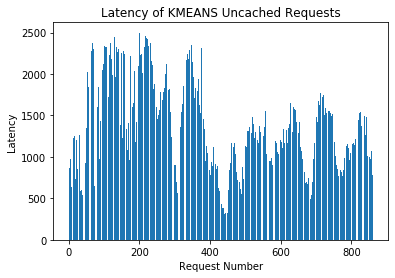

In [110]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.bar(range(0,df_kmeansuncached.shape[0]),df_kmeansuncached['Latency'])
plt.title('Latency of KMEANS Uncached Requests')
plt.show()

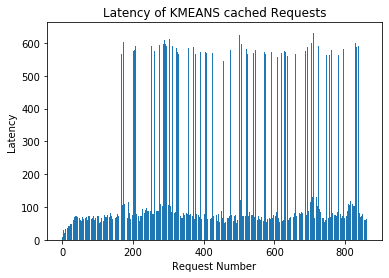

In [111]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.bar(range(0,df_kmeanscached.shape[0]),df_kmeanscached['Latency'])
plt.title('Latency of KMEANS cached Requests')
plt.show()

# COMBINING KMEANS CACHED AND UNCACHED

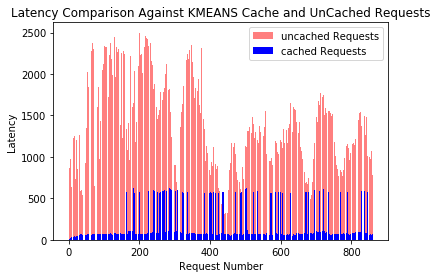

In [381]:
#Latency is a difference between time when request was sent and time when response has started to be received.
p1 = plt.bar(range(0,df_kmeansuncached.shape[0]),df_kmeansuncached['Latency'],color="red",alpha=0.5)
p2 = plt.bar(range(0,df_kmeanscached.shape[0]),df_kmeanscached['Latency'], color="blue", alpha=1)


plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.title('Latency Comparison Against KMEANS Cache and UnCached Requests')
plt.legend((p1[0], p2[0]), ('uncached Requests', 'cached Requests'))
plt.show()

# DBSCAN CACHED/UNCACHED LATENCY RESULTS

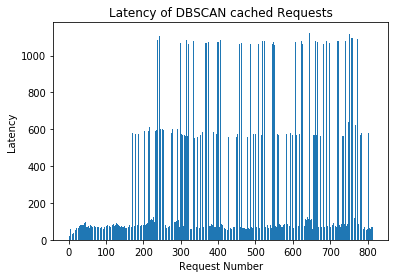

In [383]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.bar(range(0,df_dbscancached.shape[0]),df_dbscancached['Latency'])
plt.title('Latency of DBSCAN cached Requests')
plt.show()

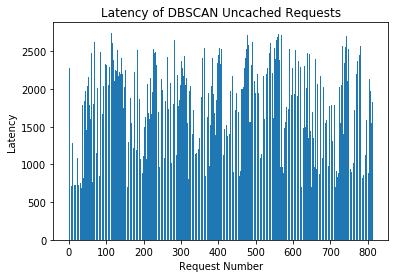

In [382]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.bar(range(0,df_dbscanuncached.shape[0]),df_dbscanuncached['Latency'])
plt.title('Latency of DBSCAN Uncached Requests')
plt.show()

# COMBINING DBSCAN CACHED/UNCACHED LATENCY

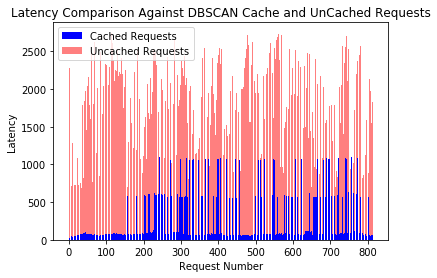

In [140]:
#Latency is a difference between time when request was sent and time when response has started to be received.

p2 = plt.bar(range(0,df_dbscanuncached.shape[0]),df_dbscanuncached['Latency'], color="red", alpha=0.5)
p1 = plt.bar(range(0,df_dbscancached.shape[0]),df_dbscancached['Latency'],color="blue",alpha=1)

plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.title('Latency Comparison Against DBSCAN Cache and UnCached Requests')
plt.legend((p1[0], p2[0]), ('Cached Requests', 'Uncached Requests'))
plt.show()

# HDBSCAN

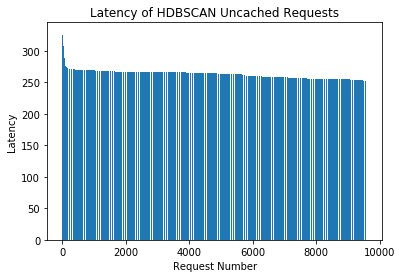

In [342]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.bar(range(0,df_hdbuncache.shape[0]),df_hdbuncache['Latency'])
plt.title('Latency of HDBSCAN Uncached Requests')
plt.show()

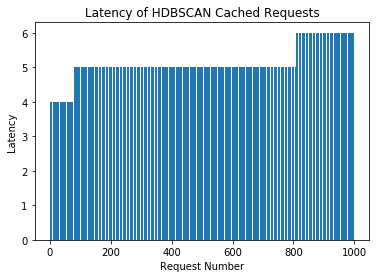

In [352]:
#Latency
#Latency is a difference between time when request was sent and time when response has started to be received.
plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.bar(range(0,df_hdbcache.shape[0]),df_hdbcache['Latency'])
plt.title('Latency of HDBSCAN Cached Requests')
plt.show()

# COMBINING DBSCAN-KMEANS CACHED LATENCY

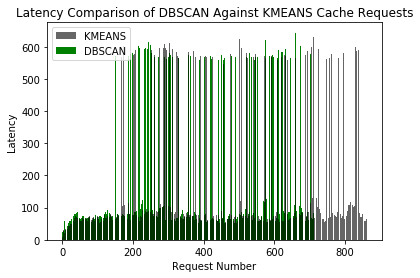

In [197]:
#Latency is a difference between time when request was sent and time when response has started to be received.
p2 = plt.bar(range(0,df_dbscancached_.shape[0]),df_dbscancached_['Latency'], color="green", alpha=1)
p1 = plt.bar(range(0,df_kmeanscached.shape[0]),df_kmeanscached['Latency'],color="black",alpha=0.6)

plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.title('Latency Comparison of DBSCAN Against KMEANS Cache Requests')
plt.legend((p1[0], p2[0]), ('KMEANS', 'DBSCAN'))
plt.show()

# COMBINING DBSCAN-KMEANS UNCACHED LATENCY

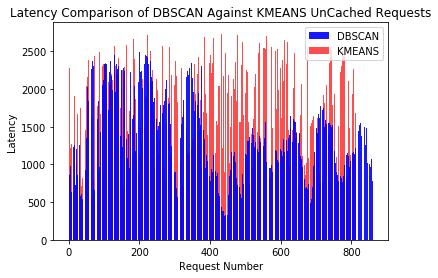

In [184]:
#Latency is a difference between time when request was sent and time when response has started to be received.
p2 = plt.bar(range(0,df_dbscanuncached.shape[0]),df_dbscanuncached['Latency'], color="red", alpha=0.7)
p1 = plt.bar(range(0,df_kmeansuncached.shape[0]),df_kmeansuncached['Latency'],color="blue",alpha=0.9)



plt.xlabel('Request Number')
plt.ylabel('Latency')
plt.title('Latency Comparison of DBSCAN Against KMEANS UnCached Requests')
plt.legend((p1[0], p2[0]), ('DBSCAN', 'KMEANS'))
plt.show()

In [279]:
df_dbscanuncached_line = df_dbscanuncached
df_dbscanuncached_line = df_dbscanuncached_line.sort_values(by='Latency',ascending=True)
df_dbscanuncached_line = df_dbscanuncached_line[:200]
df_dbscanuncached_line.reset_index(inplace=True)
df_dbscanuncached_line["index"] = df_dbscanuncached_line.index

In [305]:
df_dbscanuncached_line["Latency"].unique()

array([ 592,  597,  600,  606,  628,  630,  632,  657,  660,  662,  671,
        693,  695,  702,  703,  704,  708,  710,  713,  714,  715,  716,
        718,  719,  725,  726,  728,  734,  743,  746,  748,  751,  753,
        754,  755,  760,  762,  764,  765,  766,  771,  780,  795,  798,
        801,  802,  804,  805,  806,  807,  809,  815,  820,  822,  823,
        825,  827,  828,  831,  834,  841,  842,  845,  849,  850,  853,
        860,  863,  864,  866,  868,  870,  872,  875,  881,  882,  884,
        889,  890,  893,  895,  897,  899,  900,  901,  905,  906,  911,
        913,  915,  917,  919,  927,  929,  932,  938,  939,  941,  942,
        947,  955,  956,  965,  967,  969,  970,  973,  982,  984,  986,
        987,  988,  989,  992,  999, 1010, 1012, 1013, 1016, 1017, 1019,
       1021, 1026, 1040, 1051, 1053, 1058, 1064, 1065, 1066, 1072, 1074,
       1079, 1083, 1085, 1086, 1091, 1094, 1095, 1101, 1102, 1110, 1114,
       1118, 1121, 1126, 1127, 1132, 1134, 1142, 11

In [291]:
df_kmeansuncached_line = df_kmeansuncached
df_kmeansuncached_line = df_kmeansuncached_line.sort_values(by='Latency',ascending=True)
df_kmeansuncached_line = df_kmeansuncached_line[:200]
df_kmeansuncached_line.reset_index(inplace=True)
df_kmeansuncached_line["index"] = df_kmeansuncached_line.index

In [306]:
df_kmeansuncached_line["Latency"].unique()

array([301, 302, 312, 323, 327, 330, 341, 343, 347, 350, 368, 369, 379,
       385, 394, 399, 420, 433, 446, 459, 491, 493, 504, 507, 509, 529,
       530, 534, 544, 545, 547, 553, 554, 558, 559, 561, 565, 579, 583,
       584, 588, 592, 594, 596, 601, 602, 604, 608, 614, 619, 622, 623,
       624, 625, 629, 634, 635, 640, 650, 655, 656, 664, 668, 682, 693,
       696, 699, 700, 701, 702, 705, 706, 707, 714, 717, 719, 724, 731,
       732, 735, 737, 738, 744, 748, 755, 756, 760, 764, 767, 768, 770,
       771, 773, 775, 776, 778, 780, 783, 784, 785, 786, 788, 801, 805,
       812, 813, 815, 817, 819, 820, 823, 825, 829, 836, 837, 838, 843,
       844, 845, 846, 847, 850, 857, 858, 860, 861, 862, 864, 866, 868,
       869, 870, 872, 873, 875, 876, 882, 887, 888, 890, 891, 893, 894,
       895, 897, 899, 901, 902, 906, 908, 909, 911, 915, 920, 921, 922,
       924, 925, 929, 930, 932, 934, 935, 939, 941, 942, 945, 946, 947,
       950, 953], dtype=int64)

In [326]:
df_hdbuncache_line = df_hdbuncache[df_hdbuncache["Latency"] < 2500]
df_hdbuncache_line = df_hdbuncache_line.sort_values(by='Latency',ascending=True)
df_hdbuncache_line = df_hdbuncache_line[:200]
df_hdbuncache_line.reset_index(inplace=True)
df_hdbuncache_line["index"] = df_hdbuncache_line.index

In [327]:
df_hdbuncache_line["Latency"].unique()

array([ 31,  32,  33,  34,  35,  37,  39,  57,  60,  62,  63,  64,  65,
        66,  67,  68,  69,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  88,  91,  95, 252, 253], dtype=int64)

In [330]:
df_dbscancached__line = df_dbscancached_
df_dbscancached__line = df_dbscancached__line.sort_values(by='Latency',ascending=True)
df_dbscancached__line = df_dbscancached__line[:200]
df_dbscancached__line.reset_index(inplace=True)
df_dbscancached__line["index"] = df_dbscancached__line.index

df_dbscancached__line["Latency"].unique()

array([22, 25, 28, 29, 31, 32, 33, 38, 39, 44, 48, 51, 52, 53, 54, 55, 56,
       57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], dtype=int64)

In [331]:
df_kmeanscached__line = df_kmeanscached
df_kmeanscached__line = df_kmeanscached__line.sort_values(by='Latency',ascending=True)
df_kmeanscached__line = df_kmeanscached__line[:200]
df_kmeanscached__line.reset_index(inplace=True)
df_kmeanscached__line["index"] = df_kmeanscached__line.index

df_kmeanscached__line["Latency"].unique()

array([ 9, 13, 14, 15, 20, 22, 25, 28, 29, 31, 32, 34, 35, 36, 37, 40, 42,
       43, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61,
       62, 63, 64, 65, 66], dtype=int64)

In [372]:
df_hdbcache_line = df_hdbcache_
df_hdbcache_line = df_hdbcache_line.drop_duplicates('Latency')
df_hdbcache_line = df_hdbcache_line[df_hdbcache_line["Latency"] < 80]
df_hdbcache_line = df_hdbcache_line.sort_values(by='Latency',ascending=True)
df_hdbcache_line = df_hdbcache_line
df_hdbcache_line.reset_index(inplace=True)
df_hdbcache_line["index"] = df_hdbcache_line.index

df_hdbcache_line["Latency"].unique()

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 37, 39,
       57, 60, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77,
       78, 79], dtype=int64)

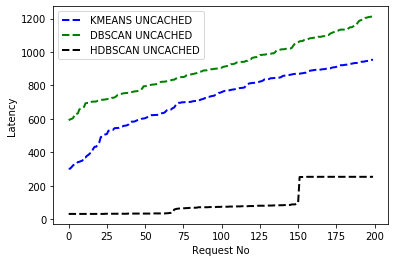

In [378]:
# df_dbscanuncached_line.set_index('index')["Latency"].plot()

plt.plot( 'index', "Latency", data=df_kmeansuncached_line, marker='', color='blue', linewidth=2, linestyle='dashed',label="KMEANS UNCACHED")
plt.plot( 'index', "Latency", data=df_dbscanuncached_line, marker='', color='green', linewidth=2, linestyle='dashed', label="DBSCAN UNCACHED")
plt.plot( 'index', "Latency", data=df_hdbuncache_line, marker='', color='black', linewidth=2, linestyle='dashed', label="HDBSCAN UNCACHED")
plt.xlabel("Request No")
plt.ylabel("Latency")
plt.legend()


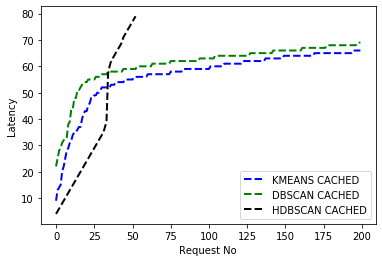

In [377]:
# df_dbscanuncached_line.set_index('index')["Latency"].plot()

plt.plot( 'index', "Latency", data=df_kmeanscached__line, marker='', color='blue', linewidth=2, linestyle='dashed',label="KMEANS CACHED")
plt.plot( 'index', "Latency", data=df_dbscancached__line, marker='', color='green', linewidth=2, linestyle='dashed', label="DBSCAN CACHED")
plt.plot( 'index', "Latency", data=df_hdbcache_line, marker='', color='black', linewidth=2, linestyle='dashed', label="HDBSCAN CACHED")
plt.xlabel("Request No")
plt.ylabel("Latency")
plt.legend()
